<div class="row">
    <div class="column">
        <img src="https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2017/03/data-science-campus-logo-new.svg"
             alt="Data Science Campus Logo"
             align="right" 
             width = "340"
             style="margin: 0px 60px"
             />
    </div>
    <div class="column">
        <img src="https://cdn.ons.gov.uk/assets/images/ons-logo/v2/ons-logo.svg"
             alt="ONS Logo"
             align="left" 
             width = "420"
             style="margin: 0px 30px"/>
    </div>


---

<center><h1><font size=6>Chapter 3<font></h1></center>
<center><h1><font size=7>Generalised Linear Models<font></h1></center>
    
*By Dr. Laurie Baker and Dr. Daniel J. Lewis*</div>


# Introduction

The traditional statistical approach was to assume that all variation in the data was normally distributed, or to transform the data until it was, and then use classical methods based on the normal distribution to draw conclusions. 

In generalized linear models, variability isn't just a nuisance, but actually tells us something about the processes we are interested in. What we treat as "signal" and what we treat as "noise"  depends on our question. The same source of variability might provide an interesting insight into the data or be something we wish to account for so we can explore it further. 

In the next section, we will introduce you to a few common distributions that capture different forms of variation in the response variable from the exponential family.

We will then give practical examples of how to fit and interpret these models using python. 

## Probability and Random Variables (Discrete and Continuous) 

**Why is probability important?**

Uncertainty and variability occur in many aspects of life. Probability helps us make sense and quantify uncertainties. Probability also helps us make informed decisions on what is likely to happened, based on patterns in the data collected.


<div class="alert alert-block alert-success">
<b><font size="4"> Terminology</font> </b> 
<p> 
    
* `Probability` is the chance of an event occurring, defined between 0 and 1.

    * 0 = will never happen, 1 = will always happen

* `Random Variable` is the variable that takes values depending on outcomes of random events. It can be discrete if it can take distinct, separate values (country) or continuous (age, weight).  

* `Probability distribution` the probability distribution for a random variable describes how the probabilities are distributed over the values of the random variable. 
    * For a `discrete random variable`, x, the probability distribution is defined by a **probability mass function**, denoted by $f(x)$.
    * For a `continuous random variable`, because there is an infinite number of values in any interval (e.g. you can always go to smaller and smaller decimals), we instead consider the probability that a continuous random variable will lie within a given interval. Here the probability distribution is defined by a **probability density function**, also denoted by $f(x)$.
  
Both probability functions must satisfy two requirements:

  1. $f(x)$ must be non-negative for each value of the random variable.
  2. The sum of the probabilities for each value (or integral over all values) of the random variable must equal one. 

</p>
</div>


## The Exponential Family

Now that we know how to define a probability for discrete and continuous random variables we can take a look at a few common probability distributions from the exponential family that we can use for our response variable including Normal, Binomial, Poisson, and Negative Binomial. There is a large class of generalized linear models that we can use to model these different distributions.

### Normal (Gaussian) distribution

We've already come across the normal distribution, which we use to inspect and compare our residuals. The normal distribution is arguably the most commonly used distribution in statistics. It is used for continuous variables (e.g. height, measurement error). It has several computational properties which make it easy to work with. For instance, it is symmetric, unimodal, and the mean, median, and mode are all equal. That means it can be captured just by specifying the mean and the variance. 

You may use it to represent changes in population. Let's say you know the population mean but wish to understand how much it varies (e.g. by +/- 10\%, +/- 15\%).  

Below we have two plots of the normal distribution, where the mean is the same: 0, but with higher (5) or lower (1) variance. 


In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualisation and plotting
import statsmodels.api as sm # statistical modelling package
import statsmodels.formula.api as smf # statistical modelling package with R-like formulas
import scipy.stats as stats
import math

# Seaborn plot default configurations
sns.set_style("white")

from statsmodels.genmod.generalized_linear_model import GLM # importing packages to run GLM
from statsmodels.genmod import families # importing families for exponential families
from pandas.plotting import register_matplotlib_converters # additional package support for plotting with matplotlib

# supress warnings due to different versions of packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

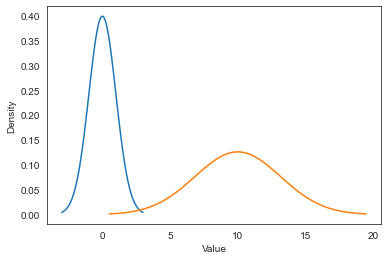

In [38]:
## Normal Distribution

# A normal distribution with mean 0 and variance 1
mu = 0 # mean
variance = 1 # variance
sigma = math.sqrt(variance) # std deviation
# random generated sample of 
# the normal distribution to plot
norm_1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) # creates the range of x values

plt.plot(norm_1, stats.norm.pdf(norm_1, mu, sigma))


# A normal distribution with mean 10 and variance 10
mu = 10 # mean
variance = 10 # variance
sigma = math.sqrt(variance) # std deviation

# random generated sample of 
# the normal distribution to plot
norm_2 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) # creates the range of x values

plt.plot(norm_2, stats.norm.pdf(norm_2, mu, sigma))

plt.ylabel('Density')
plt.xlabel('Value')
plt.show()


The normal distribution is useful for modelling continuous data. In the earlier example, it was appropriate to assume that our response variable (salary) was normally distributed given that it is a measured continuous variable. 

### Binomial

The binomial distribution applies when you have a series of trials where the outcome of the trial can only take one of two values (e.g. heads/tails, alive/dead, present/absent, buyers/non-buyers).

The binomial distribution can be written as: 

$P(\text{k out of n}) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$


where $n$ is the number of trials, $k$ is the number of successes, and $p$ is the probability of success.

We can then get the mean as $\mu = np$ and the variance is $\sigma^2 = np(1-p)$.

In the case where there is only one trial (e.g. one coin toss) we can use the **bernoulli distribution**. The bernoulli distribution is a special case of the Binomial distribution, and is used to describe an instance of the binomial distribution where there is only a single trial. So if we have one coin toss, it can only have two outcomes: heads (0) or tails (1). 


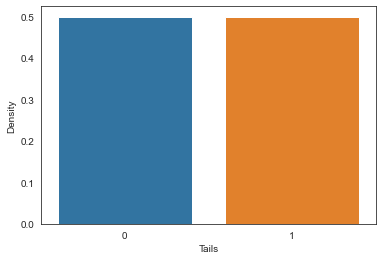

In [39]:
from scipy.stats import binom

# This gives me the number of successes, 
# in this case, heads (0), tails (1). 
k = np.arange(2) 

# If the coin is fair, we have a 50/50 chance of 
# getting tails (1), i.e. 50% probability.
data_binom = binom.pmf(k, n=1, p=0.5) 

ax_binom = sns.barplot(x=k, y=data_binom)

ax_binom.set(xlabel='Tails', ylabel='Density')

ax_binom;

If we have two coin tosses, we have 4 possible combinations: heads/heads, tails/heads, heads/tails, tails/tails. Which result in 3 outcomes: heads/heads (0+0=0), tails/tails (1+1 = 2) and heads/tails (0+1 = 1) (because the order doesn't matter). 

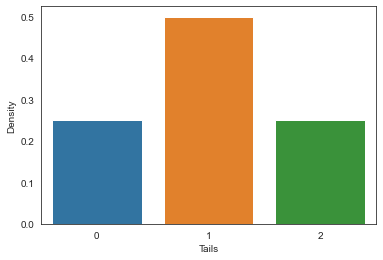

In [40]:
from scipy.stats import binom

# This gives me the number of successes, 
# in this case, heads/heads (0), tails/heads (1), tails/tails (2).
k = np.arange(3)  

# If the coin is fair, 
# we have a 50/50 chance of heads or tails, i.e. 50% probability.
data_binom = binom.pmf(k, n=2, p=0.5) 
ax_binom = sns.barplot(x = k, y = data_binom)

ax_binom.set(xlabel='Tails', ylabel='Density')

ax_binom;


I may wish to know how many students in my course like statistics before I begin. I can start by asking:
 * What is the probability that any random student likes statistics?
    * 0.7? 0.8?
    
I'm feeling pretty positive, there's an 80% chance that a random student likes statistics. But what is the probability that the whole class likes statistics? I could ask:
 * What is the probability that all 10 students in the course like statistics?
    * 0.8 x 0.8 x 0.8 ... x 0.8 = $0.8^{10} \approx 0.107$ :-(

We can get to this answer by multiplying the probability of each student liking statistics, in this case $0.8^{10}$ which is equal to $\approx 0.107$ or 10.7% chance of all students in a class of 10 liking statistics. 
    
10.7% doesn't sound very promising. But I would settle for 6-9 people out of 10 liking statistics. Of course, I won't know the answer until I attend the course, but I can get an idea of how **probable** it is that 6/10 or 7/10 of you like probability by working out the probability mass function:
 

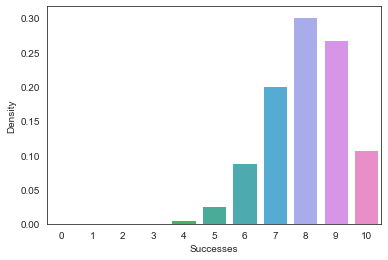

In [41]:
from scipy.stats import binom

# This gives me the number of successes, in this case, 
# students from 0 to 10 who like the course. 
k = np.arange(11)

# We can compute the probability of 0/10, 1/10... 10/10 students liking the course. 
# Where n is the number of trials (in this case the number of students).
data_binom = binom.pmf(k=k, n=10, p=0.8) 
ax_binom = sns.barplot(x=k, y=data_binom)

ax_binom.set(xlabel='Successes', ylabel='Density')

ax_binom;


In [42]:
# this is what our binomial data created looks like
data_binom

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])



The `binom` distribution function from `scipy.stats` takes n and p as shape arguments, where n is the number of trials, and p is the probability, 

In the code above we have specified that we are asking 10 random students in each trial (n), that the probability that a student likes statistics is 0.8. From the probability mass function density plot it looks quite likely that between 6-9 students will like statistics. Hooray!

Some examples of where we might use the binomial are to model

* The number of individuals with malaria out of the number of individuals in the population (e.g. an individual can have malaria (1) or not (0))

* The number of customers who bought item A out of total number of shop customers (a customer can have bought item A (1) or not (0))

Where the number of outcomes is greater than 2, e.g. (single, married, divorced), then we can use a multinomial distribution which allows for more than 2 possibilities. We can get our clue for the number of outcomes from the name (bi = 2, multi = multiple).

### Poisson 

The Poisson distribution gives the distribution of the number of individuals, arrivals, events, counts, etc., in a given time/space/unit of counting effort. 

This is the common distribution to use whenever things are counted and when they are discrete (e.g. you cannot have 1.5 of a person).

<img src="../../images/wildebeest.jfif"  width="800" height="800" alt="The number of wildebeest is an example of count data that might be modelled using a Poisson distribution.">

Image Credit: [Bjørn Christian Tørrissen CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0) via Wikimedia Commons.

The Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. For instance, we could use the Poisson distribution to model the number of cyclists crossing a bridge per day. However, the Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume. 

The Poisson distribution is given by the formula:

$$P(k\ \mathrm{events}) = \frac{\lambda^{k}e^{-\lambda}}{k!} $$

Where, $\lambda$ is the average density of the events (e.g. cyclists per day), and the function returns the likelihood of seeing $k$ cyclists.

In the Poisson distribution, the mean and the variance are the same, which is why the `poisson` function takes only the mean (mu or $\mu$) in the code below. $\mu$ is also referred to as the shape parameter in the distribution. 


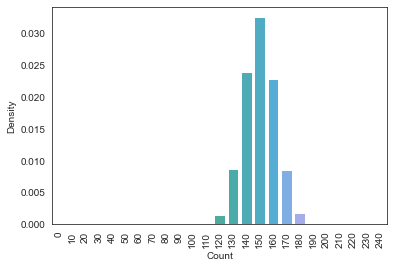

In [43]:
from scipy.stats import poisson

# generate possible x values for plot
k = np.arange(250, step = 10)

# create poisson distribution for range of x
data_poisson = poisson.pmf(k=k, mu=150)

ax_poisson = sns.barplot(x=k, y=data_poisson)

ax_poisson.set(xlabel='Count', ylabel='Density')
plt.xticks(rotation=90);


As mentioned before the poisson is the most common distribution we use to model counts (events, people, animals, etc.). However, we are constrained by the fact that the mean and variance are the same. This means that more counts, and as a result larger means allow for greater variation, whereas fewer counts with a smaller means allow for less variation. If we need to allow for more variation (i.e. wider distribution of counts) we can look to the negative binomial. 

**Fun Fact:** One of the most famous historical, practical uses of the Poisson distribution was estimating the annual number of Prussian cavalry soldiers killed due to horse-kicks.

### Negative Binomial

The negative binomial distribution is discrete, like the Poisson, but its variance can be larger than its mean, (i.e. it can be overdispersed). It is often used when the data largely follows a Poisson distribution but there are a large number of zeros in the data (e.g. few sightings and a large number of absences).

In fact, the negative binomial distribution is a generalisation of the poisson distribution, whose variance is considered separately from its mean, and hence works well when data are overdispersed. The negative binomial is usually characterised in similar terms to the binomial distribution - $r$ (number of failures observed) and $p$ (probability of success), with $k$ now representing the probability of seeing $k$ successes before $r$ failures are observed given $p$.

This is how it is done in `scipy.stats`, however it can also be parameterised in terms of its mean and variance. As a result, the mean and variance do not have to be equal as with the Poisson distribution, which makes it more flexible. 

$$p = \frac{\sigma^{2} - \mu}{\sigma^{2}}$$

$$r = \frac{\mu^{2}}{\sigma^{2} - \mu}$$

Giving the Negative Binomial distribution as:

$$Pr(X = k) = \left( \begin{matrix}
k + r - 1\\ 
k
\end{matrix} \right)p^{k} \left( \frac{\mu}{\sigma^{2}}  \right)^{r} $$

Where:  
$p$ is the probability of success in a Bernoulli trial with two outcomes (success or failure);  
$r$ is the dispersion or shape parameter;  
$k$ is the given number of successes of interest.


Note that although commonly called $r$, `scipy` refers to this parameter as $n$.

In `scipy.stats`, `nbinom` takes n and p as shape parameters where n is the number of successes, whereas p is the probability of a single success. 

In the code below we are showing a different approach, in this case we are generating random values from the negative binomial distribution. We are plotting on the x axis the number of successes (e.g. these could be counts of animals or numbers of people) before we get our first failure (e.g. no animal or no person detected). 

In this case size is the number of times we run the trial. n is the number of successes before a failure, and p is the probability of a success.


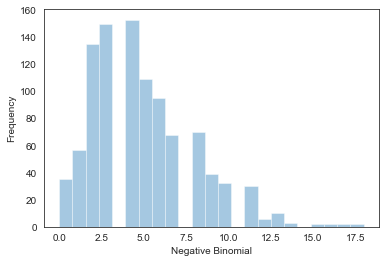

In [44]:
from scipy.stats import nbinom
data_nbinom = nbinom.rvs(n=5, p=0.5, size=1000)

ax_nbinom = sns.distplot(data_nbinom, kde=False)

ax_nbinom.set(xlabel='Negative Binomial', ylabel='Frequency')
ax_nbinom;


From this we can see that 4 successes before we see a failure is the most frequent value, followed by 5 successes. You'll notice that we also get a frequency for 0 to 30 successes. We can transform these into probabilities by dividing the frequency by the size (number of trials) we ran. 

The negative binomial, may perhaps seem a little abstract to relate the number of successes before a failure to counts, but the important information to take away is that the negative binomial can be an effective way to model count data that is overdispersed (i.e. the data has a larger variance than the mean).



<div class="alert alert-block alert-info">
<b><font size="4">Exercise</font></b> 

<p> 


1. Reflect on some examples from your own work. Write a short paragraph or discuss within a group of where you have a response variable that comes from a Binomial, Poisson, Negative binomial or Normal distribution?

2. Experiment with the poisson distribution. What happens when you experiment with the shape parameter, mu?

3. Experiment with the normal distribution. What happens when you change the variance? What happens when you change the mean?


</p> </div>


## Implementing Generalized Linear Models in Python

A generalized linear model consists of 3 parts:

1. An exponential family probability distribution
2. A linear predictor
3. A link function 

The **exponential family probability distribution**, is the probability distribution which our response variable follows, for instance, Normal, Binomial, Poisson, and Negative Binomial. 

The **linear predictor** is a linear combination of a set of coefficients and explanatory variables used to predict our response variable. This is essentially the same form used to specify our linear model, which means we can use the same formula set up for our GLM.

The **link function** allows us to use the linear predictor by providing the link to connect the exponential distribution to the linear predictor. There will often be defaults for the link when you call the model family, but you can also specify this yourself. For instance, the Poisson distribution is a discrete distribution where values can take on integers between 0 and infinity. However, the linear predictor is based on the normal distribution which is continuous and can go from -infinity to infinity. It is therefore common to use a log link to log the response variable, which effectively limits the normal distribution to 0 to infinity, thereby making it suitable for the Poisson distribution. This means that we often need to do a back transformation when we interpret the parameter coefficients in the actual scale. For example, when using the log-link we would exponentiate the coefficients. 


**Specifying the exponential family**

To specify the exponential family we add an additional argument in our model specification, `family = sm.families.Binomial()`. There are several families we can specify, here are the main ones we have covered so far:

1. `sm.families.Binomial()`
2. `sm.families.Gaussian()` *i.e. normal distribution
3. `sm.families.Poisson()`
4. `sm.families.NegativeBinomial()`

You change the link from the default, according to the model you wish to fit, by specifying it as follows:

1. `sm.families.Binomial(link='probit')`

We then specify the formula the same as before (y ~ x).

```python
formula = 'y ~ x'
mod1 = smf.GLM(formula = formula, data = df, family = sm.families.Binomial()).fit()
mod1.summary()

```


# Working with Generalised Linear Models

This exercise aims to demonstrate the implementation of a count model using glms in python and statsmodels.

# Data Preparation

In [45]:
# Read in Data
bikes = pd.read_csv("../../data/Brooklyn_Bridge_Bicycle_Counts.csv")

# Make column names lowercase
bikes.columns = bikes.columns.str.lower()

# Generate some variables
# Make date a datetime variable
bikes['date'] = pd.to_datetime(bikes['date'], format="%d-%b-%y")

# Make day of the week variable
bikes['day_of_week'] = bikes['date'].dt.day_name()

# Make weekend variable
bikes['weekend'] = bikes['date'].dt.weekday > 4

# Make month variable
bikes['month'] = bikes['date'].dt.month_name()

# Convert fahrenheit to celsius
bikes['high_temp_C'] = (bikes['high_t'] - 32) * 5/9
bikes['low_temp_C'] = (bikes['low_t'] - 32) * 5/9

# drop fahrenheit variables
bikes = bikes.drop(columns=['high_t', 'low_t'])

bikes.head()

,date,precip,bb_count,day_of_week,weekend,month,high_temp_C,low_temp_C
0,2017-04-01,0.00,606,Saturday,True,April,7.777778,2.777778
1,2017-04-02,0.00,2021,Sunday,True,April,16.722222,5.000000
2,2017-04-03,0.03,2470,Monday,False,April,17.222222,10.000000
3,2017-04-04,1.18,723,Tuesday,False,April,10.611111,7.777778
4,2017-04-05,0.00,2807,Wednesday,False,April,17.222222,7.777778


Text(0.5, 0, 'Time')

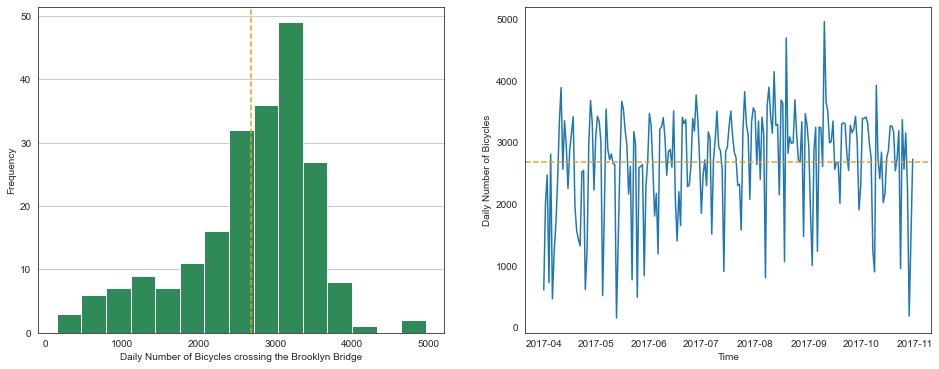

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Total Histogram
ax1.hist(bikes['bb_count'], color='seagreen', bins=15)
ax1.axvline(bikes['bb_count'].mean(), linestyle='dashed', color='goldenrod')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Daily Number of Bicycles crossing the Brooklyn Bridge')
ax1.yaxis.grid(color='0.741')

# Time plot
ax2.plot(bikes['date'], bikes['bb_count'])
ax2.axhline(bikes['bb_count'].mean(), linestyle='dashed', color='goldenrod')
ax2.set_ylabel("Daily Number of Bicycles")
ax2.set_xlabel("Time")

# Count Data

Count data are discrete data (i.e. integers) with non-negative values that count something, like the number of times an event occurs during a given time period. Our data are count data because they count the number of times that cyclists cross the Brooklyn Bridge between Brooklyn and Manhattan (or vice versa) in New York City on a given day.

Count data can also be expressed as rate data, since the number of times an event occurs in a time period can be expressed as a raw count. For instance, 2,400 cyclists crossed the Brooklyn Bridge in a day, or cyclists crossed the Brooklyn Bridge at an average rate of 200 per hour.

Poisson regression can be used to analyse count data and rate data. It allows us to determine the explanatory variables that are associated with our given response variable (the count or a rate). Poisson regression can be applied to the Brooklyn Bridge data we have here to better understand and predict the how cyclists use the bridge.


## The Poisson Distribution

The Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

The Poisson distribution is given by the formula:

$$P(k\ \mathrm{events}) = \frac{\lambda^{k}e^{-\lambda}}{k!} $$

Where, $\lambda$ is the average density of the events (e.g. cyclists per day), and the function returns the likelihood of seeing $k$ cyclists.

In some cases, such as in python, $\lambda$ (lambda) is refered to as $\mu$ (mu).

For bicycle counts, it allows us to generate estimates for the number of cyclists crossing the Brooklyn Bridge on any given day. We can do this by taking the mean number of cyclists per day, 2680, and by generating 10,000 samples from the poisson distribution:

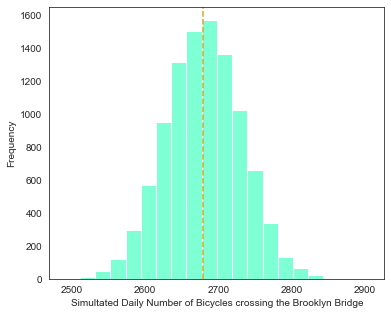

In [47]:
# mu is mean cyclists per day, size is 10000 samples.
sim_counts = poisson.rvs(mu=2680, size=10000)

f, ax = plt.subplots(figsize=(6, 5))
ax.hist(sim_counts, bins=20, color='aquamarine')
ax.axvline(sim_counts.mean(), linestyle='dashed', color='goldenrod')
ax.set_ylabel('Frequency')
ax.set_xlabel('Simultated Daily Number of Bicycles crossing the Brooklyn Bridge');

At first glance this looks reasonable, we've drawn a peaked distribution around our chosen $\lambda$. However, look a bit closer and you'll see something is not right. The spread of the simulated poisson data doesn't seem to be any where near the spread of our actual data.

Notice that the Poisson distribution only has one parameter: $\lambda$ (aka $\mu$), this parameter tells us where the peak of the distribution is located on the x axis. By comparison, the normal distribution has a similar parameter, $\mu$, which tells you where to locate the peak of the normal distribution. The normal distribution also has another parameter, $\sigma$, the standard deviation which specifies the spread of the data around $\mu$. Because the poisson distribution only has $\lambda$, an assumption is made that the variance, $\sigma^2$, of the data is equal to the mean ($\lambda$), this assumption is called the "equi-dispersion" assumption. Effectively, for a poisson model to be appropriate, the variance = mean.

We can see that in the simulated data we produced above this is the case, the effect of having the variance equal to the mean is that the standard deviation, $\sigma$, of the count data is only 52 bicycles per day ($\sqrt(2680)$). The actual data has a much greater spread and as a result a much higher variance.

In [48]:
# mean and variance of simulated poisson data
sim_counts.mean(), sim_counts.var()

(2679.4246, 2644.26711484)

In [49]:
# mean and variance of cyclist data
bikes['bb_count'].mean(), bikes['bb_count'].var()

(2680.042056074766, 730530.6601948135)

While the simulated data obeys the equi-dispersion assumption, it is clear that our observed data does not. While we can happily fit a poisson regression to model our cyclist counts, the model will violate the equi-dispersion assumption and produce artificially small standard errors. This could lead to you attributing significance to model coefficients that aren't, in reality, important.

## The Negative Binomial Distribution

The negative binomial distribution is a generalisation of the poisson distribution, whose variance is considered separately from its mean, and hence works well when data are overdispersed. The negative binomial is usually characterised in similar terms to the binomial distribution: $r$ (number of failures observed) and $p$ (probability of success), with $k$ now representing the probability of seeing $k$ successes before $r$ failures are observed given $p$.

This is how it is done in `scipy.stats`, however it can also be parameterised in terms of its mean and variance. As a result, the two do not have to be equal as with the Poisson distribution, and the negative binomial distribution can better represent the count data of interest.

$$p = \frac{\sigma^{2} - \mu}{\sigma^{2}}$$

$$r = \frac{\mu^{2}}{\sigma^{2} - \mu}$$

Giving the Negative Binomial distribution as:

$$Pr(X = k) = \left( \begin{matrix}
k + r - 1\\ 
k
\end{matrix} \right)p^{k} \left( \frac{\mu}{\sigma^{2}}  \right)^{r} $$

Where:  
$p$ is the probability of success in a Bernoulli trial with two outcomes (success or failure);  
$r$ is the dispersion or shape parameter;  
$k$ is the given number of successes of interest.

We can parameterise a negative binomial distribution based on the mean and variance of the observed bicycle count data.

Note that although commonly called $r$, `scipy` refers to this parameter as $n$.

We can calculate these values directly from the data using:

In [50]:
p = (bikes['bb_count'].var() - bikes['bb_count'].mean()) / bikes['bb_count'].var()
p

0.9963313763513224

In [51]:
r = (bikes['bb_count'].mean() **2) / (bikes['bb_count'].var() - bikes['bb_count'].mean())
r

9.868268630034121

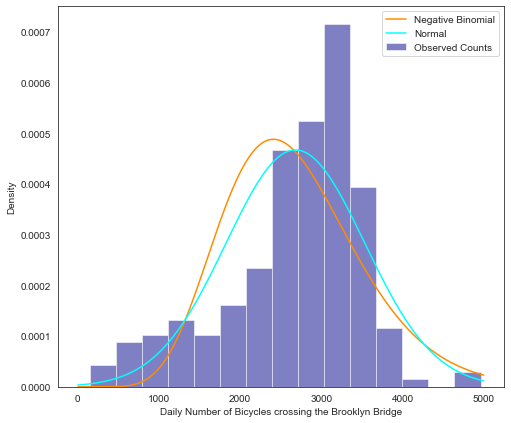

In [52]:
from scipy.stats import norm

f, ax = plt.subplots(figsize=(8, 7))

# plot the counts of the data
ax.hist(bikes['bb_count'],
        color='darkblue',
        bins=15,
        alpha=0.5,
        density=True,
        label='Observed Counts')

# plot a negative binomial using the derived coefficient values
ax.plot(nbinom.pmf(np.arange(0, 5000), n=r, p=1-p),
        color='darkorange',
        label="Negative Binomial")

# plot a normal distribution using the mean and standard deviation from the data
# not that we are using standard deviation not variance for this model
ax.plot(norm.pdf(np.arange(0, 5000), loc=bikes['bb_count'].mean(), scale=bikes['bb_count'].std()),
        color='cyan',
        label='Normal')

ax.set_xlabel("Daily Number of Bicycles crossing the Brooklyn Bridge")
ax.set_ylabel("Density")
ax.legend();

The negative binomial model is not an exact fit for the bicycle count data, however we don't require it to be. We simply assume *errors* will follow a negative binomial distribution, the count of bicycle crossings can be a mix of distributions to be dealt with in the modelling phase to come.

The normal distribution is also often seen as a reasonable approximation for count data when the average value for count is high, the normal curve is also superimposed on the graph.

In general, the assumption that each 'event' (e.g. bicycle crossing the Brookyln Bridge) is independent is likely to be optimistic, but in the absence of any other information we'll make this assumption.

# A Generalized Linear Modelling Approach

We're going to use a generalized linear modelling approach to model bicycle counts. We'll start with a simple linear model, looking at how the mean of bicycle counts differs according to whether it is a weekend day. The model is thus:

$$\mathrm{Bicycle\ Counts}_{i} = \beta_{0} + \beta_{1} \times \mathrm{Weekend\ Day} + \epsilon_{i}$$

Because weekend day is binary, we're effectively left with two equations:

1. $\mathrm{Bicycle\ Counts} = \beta_{0} + \beta_{1}$ : For Saturdays and Sundays
2. $\mathrm{Bicycle\ Counts} = \beta_{0}$: For weekdays.

We'll start off by fitting the model using a Gaussian linear model with an identity link - effectively a standard Ordinary Least Squares (OLS) regression.

In [53]:
model = sm.formula.glm(formula='bb_count~weekend',
                       data=bikes, 
                       family=sm.families.Gaussian()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               bb_count   No. Observations:                  214
Model:                            GLM   Df Residuals:                      212
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      7.0789e+05
Method:                          IRLS   Log-Likelihood:                -1743.9
Date:                Wed, 28 Apr 2021   Deviance:                   1.5007e+08
Time:                        10:07:29   Pearson chi2:                 1.50e+08
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2782.7171     68.243     40.776      0.000    2648.963    2916.472
weekend[T.True]  -354.3945    126.786     -2.795      0.005    -602.891    -105.899
===================================================================================
"""

Expressly using the `statsmodels` OLS model would produce some specific goodness of fit statistics relevant to linear regression, however the GLM approach is understandably more general. This means we don't get the $R^{2}$ statistic that we're familiar with, however this is straightforward to compute.

In [54]:
total_sum_squares = ((bikes['bb_count'] - bikes['bb_count'].mean())**2).sum()

# model.predict() will give predicted values for all of the
# data points seen by the model
regression_sum_squares = ((model.predict() - bikes['bb_count'].mean())**2).sum()

R_squared = regression_sum_squares / total_sum_squares
R_squared

0.035544913331642045

Here, the simple linear regression tells us that the mean number of bicycle trips taken on a weekday is the intercept ($\beta_{0}$) at 2,783 trips per day, while the mean number of bicycle trips on a weekend day is lower at 2,428 trips per day ($\beta_{0} + \beta_{1}$, or 2783 - 354).

This difference is statistically significant (we can define significance as p < 0.05, and our value is p = 0.005), the difference between the weekend and the weekday is unlikely to have occured by chance (5 in 1000 chance), thus this appears to be a real difference.

However, the distinction between weekday and weekend only accounts for about 3.5% of the variance in cycling trips, so there is currently a lot missing from our model. Think about when you go to ride a bike? Do you take the weather such as the temperature and rain into account? Does it depend on if you use your bike for work or for pleasure? 


We can also visualise the residuals (the variation that hasn't been explained by the model). As you can see below, the residuals don't fit a normal distribution as assumed. The qqplot looks quite wiggly, and we would expect to see a bell curve shape in our histogram. This signifys that our residuals do not follow a normal distribution and that our model might be missing an important variable that explains the variation.

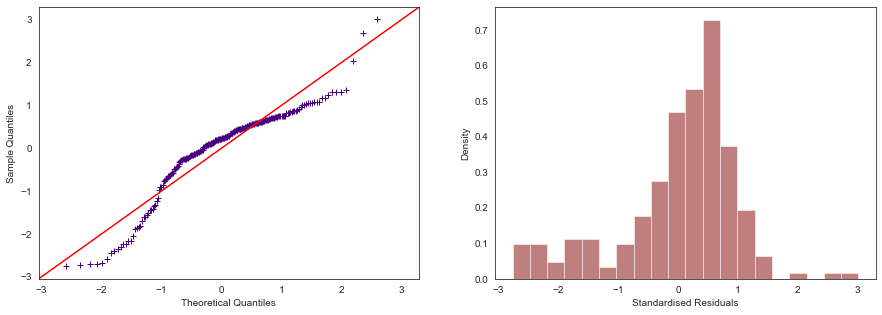

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# qq plot
sm.graphics.qqplot(data=model.resid_anscombe_scaled,
                   line='45',
                   color='indigo',
                   marker='+',
                   ax=ax1)

# Residual histogram
ax2.hist(model.resid_anscombe_scaled,
         bins=20,
         density=True,
         color='maroon',
         alpha=0.5)

ax2.set_xlabel("Standardised Residuals")
ax2.set_ylabel("Density");


# Poisson Regression

We're first going to estimate a Poisson regression on our bicycle data, even though we suspect it of being a bad model due to over-dispersion of our data. Generally, it is good practice to start with a Poisson model and use it as a comparator for more complicated models like the negative binomial or generalised poisson models.

$$\mathrm{Bicycle\ Counts}_{i} \sim Poisson(\lambda_{i})$$

$$\log(\mathrm{Bicycle\ Counts_{i}}) = \beta_{0} + \beta_{1} \times \mathrm{Weekend\ Day} + \epsilon$$

So, we assume that our outcome (dependent) variable is Poisson distributed, therefore our model must form a link between the bounds of the linear model equation ($-\infty$ to $\infty$) and the bounds of the Poisson distribution ($0$ to $\infty$). Commonly, the link function chosen is the $log$, which does just that.

In [56]:
poisson_glm = sm.formula.glm(formula='bb_count~weekend', 
                             data=bikes, 
                             family=sm.families.Poisson()).fit() # default parameter for Poisson() link is "log"
poisson_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               bb_count   No. Observations:                  214
Model:                            GLM   Df Residuals:                      212
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34991.
Date:                Wed, 28 Apr 2021   Deviance:                       67917.
Time:                        10:11:44   Pearson chi2:                 5.63e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9312      0.002   5158.154      0.000       7.928       7.934
weekend[T.True]    -0.1362      0.003    -45.393      0.000      -0.142      -0.130
===================================================================================
"""

The model parameters are now reported on the log scale owing to the link function, this means that we need to exponentiate if we want to see what the values of $\beta_{0}$ and $\beta_{1}$ are on the original scale of the data.

In [57]:
print(f"Estimated mean bicycles on a weekday: \
        {np.exp(poisson_glm.params['Intercept']).round()}")
print(f"Estimated mean bicycles on a weekend: \
        {np.exp(poisson_glm.params['Intercept'] + poisson_glm.params['weekend[T.True]']).round()}")

Estimated mean bicycles on a weekday:         2783.0
Estimated mean bicycles on a weekend:         2428.0


Perhaps unsurprisingly, these averages are the same as with the linear model we fitted earlier.

The goodness of fit for the Poisson regression can be assessed with reference to the 'deviance', this is effectively a measure of badness-of-fit, with higher values indicating a worse fitting model. Basically, it is the difference between the 'fully saturated' (i.e. best possible model) and the model we have fit, ideally we a small difference to the best possible model, and hence low values are preferred.

But low compared to what? We also compute a 'null deviance' as the worst case scenario. The null deviance measures how well the outcome is predicted by the intercept alone - that is, just using the mean. Any model we fit should be a better model that the intercept only model.

In [59]:
print(f"Null deviance:\t {poisson_glm.null_deviance.round()}")
print(f"Deviance:\t {poisson_glm.deviance.round()}")

Null deviance:	 70021.0
Deviance:	 67917.0


The deviance has come down from the simple null model of the intercept, however it remains high relative to the null model and is a long, long way from the best possible model.

Similarly, the Pearson $\chi^{2}$ statistic is a test for the adequacy of the current fitted model, here, the test-statistic is very large suggesting considerable lack of fit against the null hypothesis of an adequate model. It effectively compares the observed counts in our data with the counts we expect or predict based on the model.

In [60]:
from scipy.stats import chi2

poisson_glm.pearson_chi2, chi2.sf(poisson_glm.pearson_chi2, 
                                  poisson_glm.df_resid)

(56299.6835901802, 0.0)

It is also possible to estimate a *pseudo*-$R^{2}$ value, analogous to the $R^{2}$ in linear regression. This is because the null model provides a lower boundary for how badly a model can perform. Therefore, a pseudo $R^{2}$ is effectively the ratio between the fitted and null model.

$$R^{2} = 1 - \frac{\mathrm{LL(Fitted\ Model)}}{\mathrm{LL(Null\ Model)}}$$

In [61]:
# llf refers to the log-likelihood function of the model
pseudo_r_squared = 1 - (poisson_glm.llf / poisson_glm.llnull)
pseudo_r_squared

0.029193409823326633

The pseudo-$R^{2}$ value is ~0.03, the current model explains very little of the variance in the outcome.

Now let's have a look at the residuals - variation in the data that cannot be explained by the model. Here, I've computed the adjusted residuals, which are the residuals normalised to unit variance. These can then be compared to the normal distribution to assess the presence of structure in the residuals.

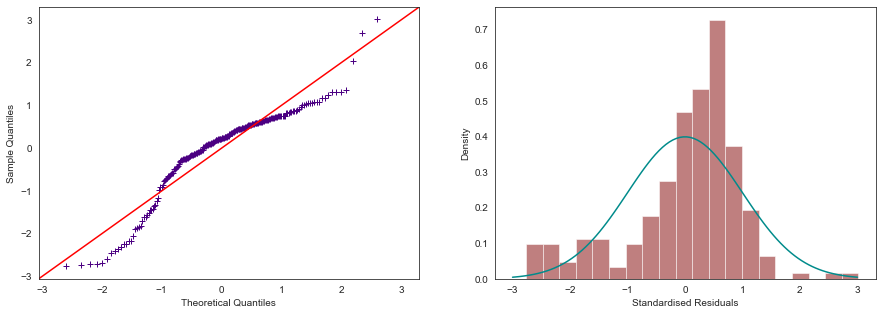

In [62]:
adjusted_residuals = (poisson_glm.resid_response /
                      poisson_glm.resid_response.std())

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# qq plot
sm.graphics.qqplot(data=adjusted_residuals,
                   line='45',
                   color='indigo',
                   marker='+',
                   ax=ax1)

# Residual histogram
ax2.hist(adjusted_residuals,
         bins=20,
         density=True,
         color='maroon',
         alpha=0.5)

# add example normal distribution to compare residuals
ax2.plot(np.linspace(-3, 3, 100),
         norm.pdf(np.linspace(-3, 3, 100), 0, 1), color='darkcyan')
ax2.set_xlabel("Standardised Residuals")
ax2.set_ylabel("Density");

In GLMs it is also common to use 'deviance residuals', these represent the square root of the contribution that each data point has to the overall deviance measure. This makes them analogous to the residuals in OLS regression.

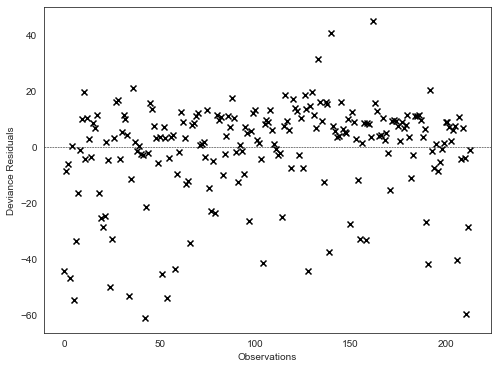

In [64]:
f, ax = plt.subplots(figsize=(8, 6))

# plot the observations against deviance residuals
ax.scatter(np.arange(len(poisson_glm.resid_deviance)),
           poisson_glm.resid_deviance,
           marker='x', 
           color='k')

ax.axhline(0, color='k', linestyle='dashed', linewidth=0.5)
ax.set_ylabel("Deviance Residuals")
ax.set_xlabel("Observations");

It's clear from the plot of deviance residuals that there are a number of outlying counts that the current model is not doing a good job of estimating.

## What do my predictions look like?

We can also have a look at the quality of our predictions by plotting them against the observed values.

Usefully, when we predict values, statsmodels does all the exponentiation for us, so we don't have to worry about the logged coefficients!

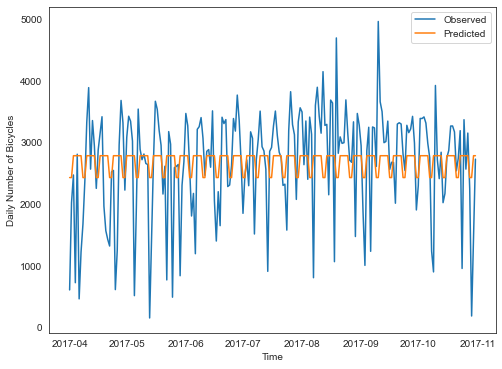

In [66]:
f, ax = plt.subplots(figsize=(8, 6))

bikes['predict'] = poisson_glm.mu

# plot counts over time
ax.plot(bikes['date'], bikes['bb_count'], label='Observed')

# plot predicted count over time
ax.plot(bikes['date'], bikes['predict'], label='Predicted')

ax.legend()
ax.set_ylabel("Daily Number of Bicycles")
ax.set_xlabel("Time");

The model currently only predicts means for weekdays and weekends, clearly there is more to account for if we want to make reasonable or useful predictions for cyclist behaviour on the Brooklyn Bridge. As we are missing the peaks and there is a lot of variation that is unaccounted for.

In statsmodels, the same results can be achieved using the Poisson regression model from the discrete dependent variable submodule directly:

In [67]:
poisson_model = sm.formula.poisson(formula='bb_count~weekend', 
                                   data=bikes).fit()
poisson_model.summary()

Optimization terminated successfully.
         Current function value: 163.507016
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               bb_count   No. Observations:                  214
Model:                        Poisson   Df Residuals:                      212
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                 0.02919
Time:                        10:30:07   Log-Likelihood:                -34991.
converged:                       True   LL-Null:                       -36043.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9312      0.002   5158.154      0.000       7.928       7.934
weekend[T.True]    -0.1362      0.003    -45.393      0.000      -0.142      -0.130
===================================================================================
"""

The model produces the same output as the GLM approach, however the output is a little different - we have the pseudo-$R^{2}$ value now instead of the deviance and the Pearson $\chi^{2}$ statistic. We also get a likelihood ratio test, telling us that the fitted model is an improvement over the intercept-only 'null' model.

## Is my Poisson model overdispersed?

As we've noted, the Poisson distribution assumes that the given mean is equal to the variance. If, in fact, our variance proves to be larger than the mean, we have overdispersed count data, which is inappropriate for the poisson model. Overdispersed data are inappropriate because they lead to an underestimation of the standard errors of our regression coefficients (these represent the precision or uncertainty of our coefficient estimates). Understated standard errors may lead us to believe that particular explanatory variables are significant in explaining our outcome of interest, when in reality they are not.

A simple check for overdispersion is the **dispersion statistic**, which is given by:  

$$\frac{\mathrm{Pearson}\ \chi^{2}}{\mathrm{Residual\ Degrees\ of\ Freedom}}$$

When the data is drawn from a Poisson distribution, this value should be approximately 1. A ratio less than 1 implies underdispersion (i.e. variance < mean), and a value more than 1 implies overdispersion (i.e. variance > mean).

Data that is underdispersed often arises dues to excess zeros, resulting from a separate data generating mechanism and requires a zero-inflated model which first fits a logit/probit model for zeroes vs. counts, and then a count model on the counts.

Data that is overdispersed can be modelled using a negative binomial model or a quasi-poisson approach.

In [68]:
dispersion_stat = poisson_glm.pearson_chi2 / poisson_glm.df_resid
dispersion_stat

265.564545236699

Clearly from the dispersion statistic we're deep in overdispersion territory! Let's look now to fitting a negative binomial model to deal with this!

# Negative Binomial Regression

We expect out data will be better served by a negative binomial regression. However, specifying the negative binomial regression requires that we specify the value of a parameter called 'alpha' ($\alpha$). Alpha effectively scales the mean such that it reflects the variance of the data and hence accounts for overdispersion:

$$\sigma^{2} = \mu + \alpha \mu^{2}$$

Clearly, as $\alpha$ tends towards zero, the variance approaches the mean, and hence becomes a Poisson regression. Therefore, the poisson model is effectively nested within the negative binomial regression approach. You can check this if you like by fitting the negative binomial model with `alpha = 0.00000001`, this should yield the same fit as the poisson model we fitted earlier. Note that `alpha = 0` causes a `ZeroDivisionError`, hence the very small value used. 

It's not entirely obvious how we pick a good value for $\alpha$. In Python, it is possible to fit the negative binomial regression using the discrete dependent variable regression submodule, in this case the value for  𝛼  is computed as part of the maximum likelihood estimation.

In [69]:
nb_mle = sm.formula.negativebinomial(formula='bb_count~weekend', data=bikes).fit()
nb_mle.summary()

Optimization terminated successfully.
         Current function value: 8.349478
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               bb_count   No. Observations:                  214
Model:               NegativeBinomial   Df Residuals:                      212
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                0.001354
Time:                        11:29:22   Log-Likelihood:                -1786.8
converged:                       True   LL-Null:                       -1789.2
Covariance Type:            nonrobust   LLR p-value:                   0.02772
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9312      0.033    241.759      0.000       7.867       7.995
weekend[T.True]    -0.1362      0.061     -2.235      0.025      -0.256      -0.017
alpha               0.1632      0.015     10.574      0.000       0.133       0.193
===================================================================================
"""

Here the estimated value of $\alpha$ is 0.1632. We can see what this means for dispersion by calculating the Pearson residuals, squaring and summing to get the $\chi^{2}$ for this model.

In [73]:
residuals = (bikes['bb_count'] - np.exp(nb_mle.fittedvalues))

fitted_values_variance = sm.families.NegativeBinomial(alpha=np.exp(nb_mle.lnalpha)) \
                             .variance(np.exp(nb_mle.fittedvalues))

pearson_residuals = residuals / np.sqrt(fitted_values_variance) # sqrt of the variance of the fitted values.

pearson_chisq = (pearson_residuals ** 2).sum()

dispersion_stat = pearson_chisq / nb_mle.df_resid
dispersion_stat

0.6114410726585718

In this particular case, the dispersion stat comes out as 0.61, suggesting that the model is underdispersed. This may mean that the standard errors are too conservative (note they are larger than our GLM standard errors). As such, we will be less likely to accept explanatory variables as contributing to our model, potentially making type II errors (failure to reject a false null hypothesis).

In this case then, the Poisson glm seems to out-perform the standard negative binomial model.

<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

Build a better model of bicycle trips over the Brookyln Bridge, consider:

1. Which variables are useful explanatory variables for your model - do some EDA and make choices.
2. Fit a Poisson model, check the intuition of the parameter estimates, the residuals and the model fit.
3. Try fitting a Negative Binomial model.

I've provided a couple of suggestions, example 1 is a multivariate negative binomial model, example 2 additionally includes an interaction term between temperature and rain.

</p>
</div>



In [ ]:
# Start coding!


In [ ]:
nb_mle = sm.formula.negativebinomial(formula='bb_count~weekend', data=bikes).fit()
nb_mle.summary()

In [ ]:
# Example Solution 1
%load ./Solutions/glm_ex1.py

In [ ]:
# Example Solution 2
%load ./Solutions/glm_ex2.py

# Implementing a Count Model in `statsmodels`

Statsmodels implements two approaches to fitting count models, either by specifying a [generalised linear model](https://www.statsmodels.org/stable/glm.html), or by expressly choosing a particular [discrete dependent variable model](https://www.statsmodels.org/stable/discretemod.html).

The main difference between these two approaches is that the discrete dependent variable regression models are fit using maximum likelihood estimation (MLE), and the glms fit using iteratively reweighted least squares (IRLS). In maximum likelihood estimation, the model is estimating the parameter values that are most likely  to have produced the data that were actually observed, that is they maximize the likelihood of the data. While in least squares approaches we want to find the parameters of the regression line that minimise the total squared distance between the data and the line. The approaches effectively amount to the same thing for our purposes.

GLMs are a flexible tool, and well worth knowing, however, the discrete dependent variable submodule offers some exotic models that aren't currently available in the GLM submodule - notably poisson models for dealing with over/under-dispersion (generalised poisson) and count models for dealing with excess zeros ('zero-inflated' counts:  zero-inflated Poisson, Generalised Poisson and Negative Binomial). Generally, zero-inflated models first fit a logit or probit model to estimate zeros vs. counts, then fit a count model on the counts.
c

## Next Steps: other statistical models

In this course we have covered linear regression and a few examples of generalized linear models. There is a whole range of models we can fit. Some of the topics we haven't covered is capturing structure in our data (e.g. repeated measures, spatial and temporal correlation, random effects, generalised additive models etc.).

<img src="../../images/statistical_models_bolker.png"  width="800" height="800" alt="Diagram of the Statistical Model Ecosystem.">

Image Credit: Ecological Models and Data in R by Ben Bolker 2007, pg 397.